In [34]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [27]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()


In [18]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [36]:
import catboost as cb
from catboost import CatBoostClassifier, Pool, metrics, cv

In [38]:
X, y = breast_cancer_data.data, breast_cancer_data.target
feature_names = np.array(breast_cancer_data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
validate_pool = cb.Pool(X_test, y_test)

In [41]:
metrics = model.eval_metrics(validate_pool, [cb.metrics.AUC(), cb.metrics.Accuracy()], plot=False)

In [42]:
model = cb.CatBoostClassifier(verbose=False)
model.fit(X_train, y_train, eval_set=validate_pool)

In [23]:
preds_class = model.predict(X_test)
# preds_proba = model.predict_proba(X_test)
print("class = ", preds_class)

class =  [0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]


In [43]:
from shap_selection import feature_selection

# please, use agnostic = True to use with any model...
# agnostic = False will only work with tree-based models
feature_order = feature_selection.shap_select(model, X_train, X_test, feature_names, agnostic=False)

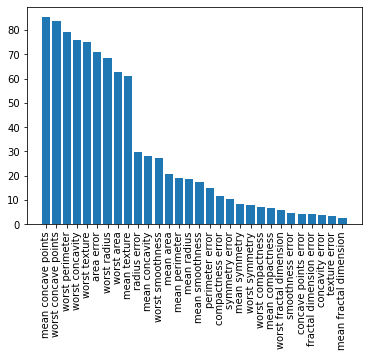

In [44]:
import matplotlib.pyplot as plt

plt.bar(feature_order[0],feature_order[1])
plt.xticks(rotation=90)
plt.show()